In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [3]:
def FRHS(v):
    return v

In [5]:
def GRHS(x,u,E,potential):
    # The boundstate energy is a negative number, so we will write E = imp.abs(E),... 
    #...so we can always give the function positive values. 
    const = 0.4829 # (Mev^-1).(fm^-2)
    if potential == 'infinite well':
        V = 0
    elif potential == 'SHO':
        V = 0.5*x*x
    else:
        print('Please choose a potential: well or SHO')
    t1 = const*(-np.abs(E) - V)*u
    return t1

In [10]:
def dsolve_SE1D(E,potential,alpha,a,b,xmin,xmax,NGrid):
    # E: boundstate potential
    # potential (string): type of potential: 'infinite well' or 'SHO'
    # a,b: boundary values of the function: u(xmin) = a, u(xmax) = b
    # xmin,xmax,NGrid: used for linspace 
    # x is measured in fm
    # alpha:
    x_grid = np.linspace(xmin,xmax,NGrid)
    h = x_grid[1] - x_grid[0]
    # Define the arrays which hold the functions at the grid points 
    u = np.zeros(NGrid)
    v = np.zeros(NGrid)
    u[xmin] = a
    v[xmin] = alpha # we guess this value
    for i in range(0,NGrid-1): 
        k1 = h*FRHS(v[i])
        l1 = h*GRHS(x_grid[i],u[i],E,potential)

        k2 = h*FRHS(v[i] + 0.5*l1)
        l2 = h*GRHS(x_grid[i] + 0.5*h,u[i] + 0.5*k1,E,potential)
        
        k3 = h*FRHS(v[i] + 0.5*l2)
        l3 = h*GRHS(x_grid[i] + 0.5*h,u[i] + 0.5*k2,E,potential)
        
        k4 = h*FRHS(v[i] + l3)
        l4 = h*GRHS(x_grid[i] + h,u[i] + k3,E,potential)
        
        u[i+1] = u[i] + k1/6.0 + k2/3.0 + k3/3.0 + k4/6.0
        v[i+1] = v[i] + l1/6.0 + l2/3.0 + l3/3.0 + l4/6.0  
    return u,v

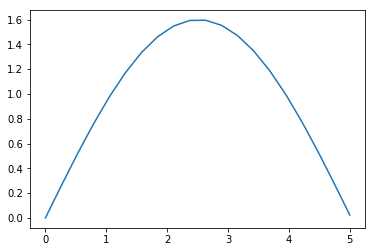

Endpoint value (u(max)):  0.023209629411007883


In [15]:
E = 0.81
# E=3.34 is the first excitation state 
potential = 'infinite well'
alpha = 1.0
a = 0 # Fixed
b = 0 # Fixed
xmin = 0 # fm
xmax = 5 # fm
NGrid = 20
x_grid = np.linspace(xmin,xmax,NGrid)
RK4_solution = dsolve_SE1D(E,potential,alpha,a,b,xmin,xmax,NGrid)
plt.plot(x_grid,RK4_solution[0])
plt.show()
print('Endpoint value (u(max)): ', RK4_solution[0][NGrid-1])